## Dataset Link : https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [5]:
df = pd.read_csv("bank_note_authentication.csv")

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

**0 ---> Authentic note**

**1 ---> Fradulent/Forged note**

In [9]:
corr = df.corr()
corr

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [10]:
df.shape

(1372, 5)

In [11]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### No missing values 

## EDA

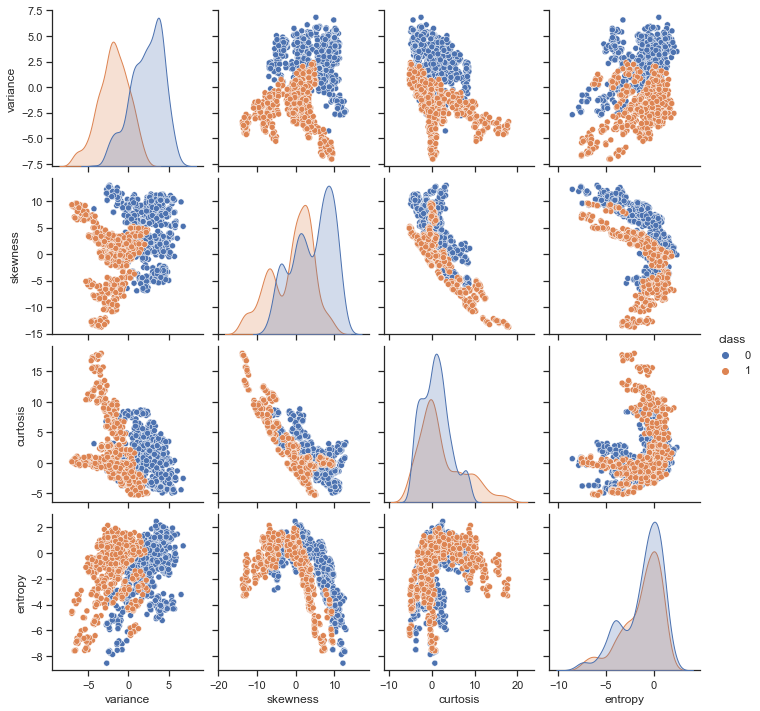

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="class")

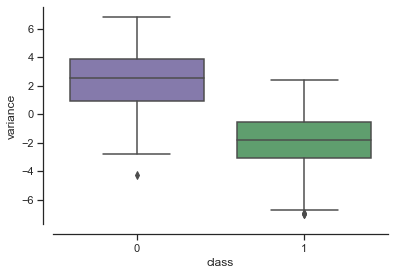

In [16]:
sns.boxplot(x="class", y="variance",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=False)

<AxesSubplot:>

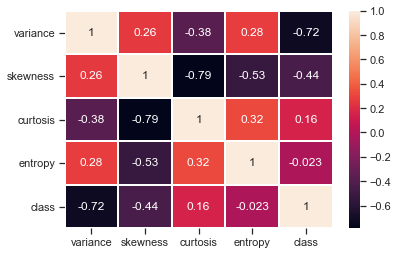

In [21]:
sns.heatmap(corr, annot=True, linewidths=1)

### Multicollinearity exists between skewness and curtosis

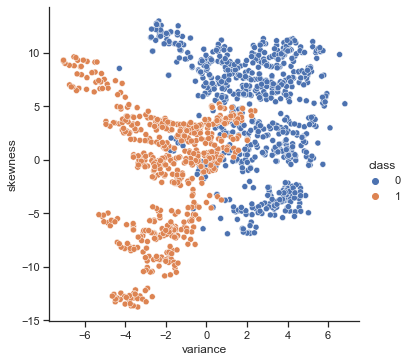

In [30]:
cmap = sns.cubehelix_palette(rot=-.4)
g = sns.relplot(
    data=df,
    x="variance", y="skewness",
    hue="class",sizes=(10, 200))


## Data Preprocessing

In [22]:
X = df.drop("class" ,axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [23]:
y = df["class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling : 0 and 1

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## Classification Models

### 1. Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

lg = LogisticRegression(solver='liblinear',random_state=1)

lg.fit(X_train, y_train)
acc = cross_val_score(estimator = lg, X = X_train,y = y_train,cv = 10)

print("Accuracies over Cross Validation:\n ",acc)

Accuracies over Cross Validation:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [53]:
print("Logistic Regression Average Accuracy is", (mean(acc)))

Logistic Regression Average Accuracy is 0.9835863219349459


In [122]:
lg_pred = lg.predict(X_test)

In [55]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, lg_pred)
print(cm)

[[151   6]
 [  1 117]]


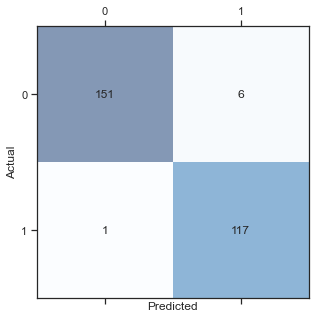

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
        s=cm[i, j],
        va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, lg_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       157
           1       0.95      0.99      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



### RFC

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc.fit(X_train, y_train)

rfc_acc = cross_val_score(estimator=rfc ,X =X_train,y =y_train, cv=10)

print("Accuracies over 10 iterations:\n ",rfc_acc)

Accuracies over 10 iterations:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [65]:
print("Random Forest Classifier Average Accuracy is", (mean(rfc_acc)))

Random Forest Classifier Average Accuracy is 0.9927272727272728


In [121]:
rfc_pred = rfc.predict(X_test)

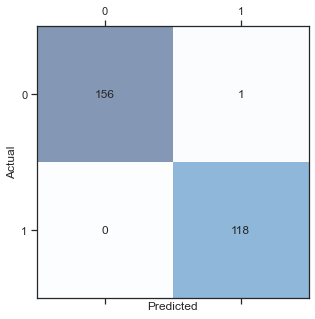

In [75]:
rfc_cm = confusion_matrix(y_test, rfc_pred)
fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(rfc_cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(rfc_cm.shape[0]):
    for j in range(rfc_cm.shape[1]):
        ax.text(x=j, y=i,
        s=rfc_cm[i, j],
        va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
print(classification_report(y_test, rfc_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### KNN 



In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [80]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [82]:
knn = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [83]:
knn_pred = knn.predict(X_test)

In [84]:
knn_acc = cross_val_score(estimator=knn ,X=X_train, y=y_train, cv=10)

print("KNN Accuracies :\n ",knn_acc)

KNN Accuracies :
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [85]:
print("K-Nearest Neighbors Average Accuracy is", (mean(knn_acc)))

K-Nearest Neighbors Average Accuracy is 0.9972727272727273


In [120]:
knn_pred = rfc.predict(X_test)


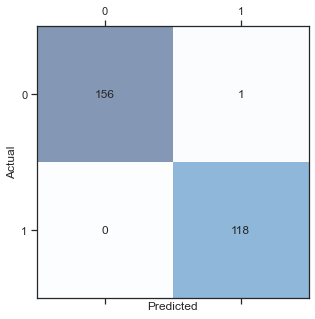

In [115]:
knn_cm = confusion_matrix(y_test, rfc_pred)
fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(knn_cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(knn_cm.shape[0]):
    for j in range(knn_cm.shape[1]):
        ax.text(x=j, y=i,
        s=knn_cm[i, j],
        va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparing 3 Models



In [89]:
print("Logistic Regression: {0:.4f}%".format(acc.mean()*100))
print("Random Forest Classifier : {0:.4f}%". format(rfc_acc.mean()*100))
print("K-Nearest Neighbors : {0:.4f}%".format(knn_acc.mean()*100))


Logistic Regression: 98.3586%
Random Forest Classifier : 99.2727%
K-Nearest Neighbors : 99.7273%


### Visualizing Results

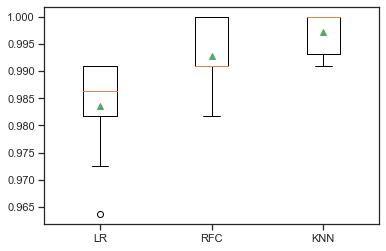

In [91]:
from matplotlib import pyplot

pyplot.boxplot([acc, rfc_acc,knn_acc], labels=['LR', 'RFC','KNN'], showmeans=True)
pyplot.show()

## Hypothesis test to check for statistical significance 

## Comparing Logistic Reg and RFC

In [119]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=lg,
                          estimator2=rfc,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p-value: %.3f' % p)

if p <= 0.05:
    print('Difference between mean performance is statistically significant')
else:
    print('Both models have the same performance on the dataset')

t statistic: -1.345
p-value: 0.236
Both models have the same performance on the dataset


**p > 0.05. Therefore, it can be concluded that the difference between the model performances is not significant**.

**Hence, the null hypothesis cannot be rejected**

## Comparing KNN and RFC

In [118]:
t1, p1 = paired_ttest_5x2cv(estimator1=knn,
                          estimator2=rfc,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t1)
print('p-value: %.3f' % p1)

if p1 <= 0.05:
    print('Difference between mean performance is statistically significant')
else:
    print('Both models have the same performance on the dataset')

t statistic: 2.335
p-value: 0.067
Both models have the same performance on the dataset


## Comparing Log Reg and KNN

In [117]:
t2, p2 = paired_ttest_5x2cv(estimator1=knn,
                          estimator2=lg,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t2)
print('p-value: %.3f' % p2)

if p2 <= 0.05:
    print('Difference between mean accuracy is statistically significant')
else:
    print('Both models have the same performance on the dataset')



t statistic: 3.777
p-value: 0.013
Difference between mean accuracy is statistically significant


**If the experiments are assumed to be conducted at a significance level of 0.05, and the p-value < 0.05, 
we can reject the null hypothesis and conclude that there is a significant difference in the performance of the 
algorithms and both models do not perform equally well on this dataset**. 

### Since p < 0.05, we can reject the null hypothesis and conclude that one algorithm performs better on the dataset than the other 